In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import pandas as pd
import scipy
from scipy.stats import norm
from scipy.optimize import curve_fit
from scipy.stats import chisquare
from scipy.stats import chi2

*Updated by LLP on 1/17/22*

*Updated by WLH on 8/24/21*

## EAX - Error Analysis Exercise

### Note

All new Physics 111 Advanced Lab students are required to complete this assignment at the beginning of the semester. It will be graded on 50 points basis; a late turn-in is allowed only with the instructor's approval before the due date. Don't jeopardize your grade on your first experiment by being late with this assignment. You need to know how to handle errors before you start a laboratory experiment.

Important: View the <a href="http://youtu.be/jR54387Wd6c">video introduction to error analysis</a> (you need to use your Berkeley email to access this). The Error Analysis Exercise due date is listed under <a href="http://experimentationlab.berkeley.edu/syllabus#Experimentation_Lab_Experiments_and_Due_Dates">Advanced Lab Report Due Dates</a>.

### References

<p>[<a class="external text" href="http://physics111.lib.berkeley.edu/Physics111/Reprints/Data%20Analysis%20Book%20PDF/Data%20Analysis%20Book%20PDF_index.html" rel="nofollow" title="http://physics111.lib.berkeley.edu/Physics111/Reprints/Data%20Analysis%20Book%20PDF/">Books available online with UC Berkeley authentication</a>]</p>
<ol><li>P. Bevington, <a href="http://physics111.lib.berkeley.edu/Physics111/Reprints/Data%20Analysis%20Book%20PDF/Bevington-Copy.pdf">"<strong>Data Reduction and Error Analysis for the Physical Sciences",</strong></a> McGraw-Hill. [An old standard that is pretty dry but straightforward. Chapter 5 is particularly important.]</li>
<li>A. C. Melissinos and J. Napolitano, [<a class="external text" href="http://physics111.lib.berkeley.edu/Physics111/Reprints/Experiments%20in%20Modern%20Physics%202nd%20Edition/Error%20Analysis%20elements%20from%20the%20theory%20of%20statistics.pdf" rel="nofollow" title="http://physics111.lib.berkeley.edu/Physics111/Reprints/Experiments%20in%20Modern%20Physics%202nd%20Edition/Error%20Analysis%20elements%20from%20the%20theory%20of%20statistics.pdf">"<strong>Experiments in Modern Physics, 2nd Edition"</strong></a>], Academic Press (2003).</li>
<li>W. H. Press, et al., [<a class="external text" href="http://physics111.lib.berkeley.edu/Physics111/Reprints/Numerical%20Recipes%20in%20C/Numerical%20Recipes%20in%20C_index.html" rel="nofollow" title="http://physics111.lib.berkeley.edu/Physics111/Reprints/Numerical%20Recipes%20in%20C/">"<strong>Numerical Recipes in C</strong>:</a>] The Art of Scientific Computing, 2nd Edition", Cambridge University Press (1992); refer to Ch. 14—"Modeling of Data". [The Numerical Recipes in Pascal or FORTRAN books contain identical information. This book is the standard reference for doing scientific work on computers. Chapter 14 has a good introduction to the method of maximum likelihood, chi–square fitting, modeling data in general, error estimates of fit parameters, and, important for later experiments, the Monte Carlo method of simulation.]</li>
<li>I. G. Hughes and T. P. A. Hase, <strong><a href="http://physics111.lib.berkeley.edu/Physics111/Reprints/Data%20Analysis%20Book%20PDF/Measurements-n-Uncertainties.pdf">Measurements and their Uncertainties</a></strong>, Oxford University Press (2010). [This is a well-written thin book that covers many basic concepts of statistics, extremely useful for this course.]</li>
<li>Louis Lyons, "<strong><a href="http://physics111.lib.berkeley.edu/Physics111/Reprints/Data%20Analysis%20Book%20PDF/Error%20Analysis%20Book-Louis%20Lyons.pdf">A Practical Guide to Data Analysis for Physical Science Students"</a></strong>  (1991) Cambridge Press; QC33.L9 1991</li>
<li>Yardley Beers, <a href="http://physics111.lib.berkeley.edu/Physics111/Reprints/Data%20Analysis%20Book%20PDF/Error%20Analysis%20-%20Beers_Theory%20of%20Error.pdf">"<strong>Introduction to the Theory of Error"</strong>;</a> ADDISON-WESLEY PUBLISHING (1957) QA275 B4 1957;</li>
</ol>

<p><span style="font-size:16px">Reprints and other information can be found on the <a href="http://physics111.lib.berkeley.edu/Physics111/">Physics 111 Library Site.</a></span></p>

### Introduction

<p>In the 111-lab, the experiment does not end when you have finished collecting your data. In many labs, you will be required to perform a detailed analysis of the data you have acquired. The point of any scientific experiment is to make quantitative statements about the properties of the physical world. A common question is, are your measurements consistent with a particular theory or not? This question can only be answered by careful analysis, including both systematic uncertainties and statistical error.</p>
<p>The goals of this exercise are twofold. One is to familiarize students with the basics of error analysis. Ideally, this will serve as a guide during the acquisition and analysis of data throughout the advanced lab. The second goal is to introduce students to the Python computing environment, which you will be using throughout the semester.</p>
<p>Before starting on EAX, please look over either the Python Tutorials <a href="https://github.com/avirukt/intro_python">https://github.com/avirukt/intro_python</a> or the<a href="/matlabintro"> </a><a href="/matlabintro" title="Intro to Matlab">Intro to </a><a href="/matlabintro">Matlab</a> section.  Additional resources for using Python are <a href="http://pythontutor.com/">http://pythontutor.com/</a> and <a href="https://datahub.berkeley.edu/">https://datahub.berkeley.edu/</a></p>

## Problem Set:

#### Problem 1: Poisson statistics

We want to measure the activity (number of decays per second, a unit known as Becquerel) of a radioactive source so that we can use it to calibrate the equipment of the gamma-ray experiment. We use an electronic counter and a timer to measure the number of decays in a given time interval. In round numbers we obtain 1000 decays in 10 minutes. How long does it take (in seconds) in order to determine the activity with a statistical uncertainty of 2%? Explain.

Enter the calculation in the cell below. Add a "Markdown" cell to explain your calculation

The variance of of poisson distribution is the square root of the measured values. Thus in this situation, the variance of measurement $x$ will have relative uncertainty $\frac{1}{\sqrt{x}}$. Solving the equation
$$\frac{1}{\sqrt{x}} = \frac{1}{50}$$ gives us $x = 2500$. This measurement will take 25min.

#### Problem 2: Error propagation

a) You are given the measurements of two sides of a rectangle $A$ and $B$ with the associate errors $\sigma_A$ and $\sigma_B$, respectively. Assuming $A$ and $B$ are uncorrelated, calculate the error in the:
>   <br> (i) sum $A+B$
    <br> (ii) difference $A-B$
    <br> (iii) the perimeter $2A+2B$
    <br> (iv) the area $A\times B$
    <br> (v) the aspect ratio $A/B$
    
b) In the muon lifetime experiment we obtain a histogram for the decay rate as a function of the time after the muon enters the detector and announces its presence. We expect the distribution (the histogram) to be described by an exponential function. Rather than fitting with an exponential function, it is more convenient to plot the logarithm of the decay rate as a function of time and then fit a straight line to it. Since each data point ($x_i,y_i$) has a statistical error, $\sigma_i$, associated with it, qualitatively, what happens to these errors when the semi-log histogram $(x_i,\log{y_i})$ is plotted? Explain and illustrate. what happens, quantitatively? Assume $y_i$ is reasonably large.

c) In a separate experiment, you find that $log_{10} E_0 = 1.7 \pm 0.7$ (at 68% confidence level, CL). What is the value of $E_0$ and the experimental bounds at 68% CL? (Note that 0.7 is not small compared to 1.7).

Write down the calculation in the "Markdown" cell below, or enclose a separate file. Show detail of your calculation. 

##### Part (a):
(i) $\sqrt{\sigma_A^2+\sigma_B^2}$

(ii) $\sqrt{\sigma_A^2+\sigma_B^2}$

(iii)$2\times \sqrt{\sigma_A^2+\sigma_B^2}$

(iv)$\sqrt{(B\times\sigma_A)^2+(A\times\sigma_B)^2}$

(v) $\sqrt{(\frac{1}{B}\times\sigma_A)^2+(\frac{A}{B^2}\times\sigma_B)^2}$

##### Part (b): 
The error bar will change drastically due to the existence of the log vertical axis. It does not mean much in this situation. 

In [64]:
x = np.linspace(0,2,100)
y = np.exp(x)+0.5*np.random.rand(100)
yerr = 0.5

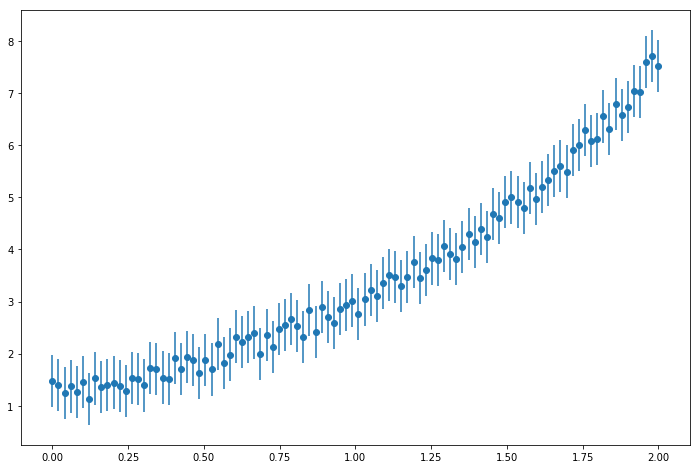

In [65]:
plt.figure(figsize = (12,8))

plt.scatter(x,y)
plt.errorbar(x,y,yerr,fmt = '.')
plt.show()

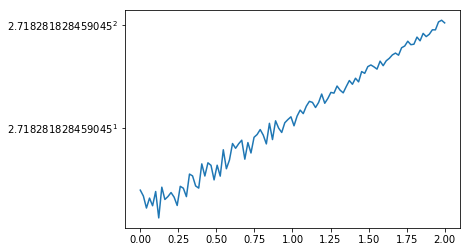

In [69]:
plt.semilogy(x,y,basey=np.e)

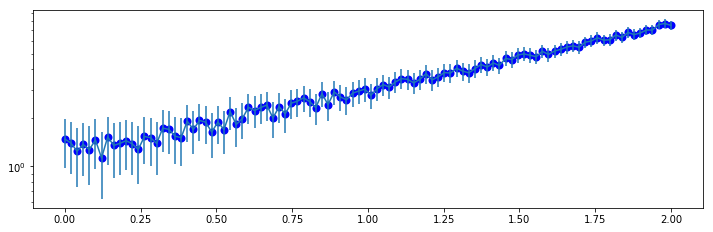

In [66]:
fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(2, 1, 1)

ax.scatter(x,y, color='blue', lw=2)
ax.errorbar(x,y,yerr)
ax.set_yscale('log')

##### Part (c)
$10^{1.7} = 50.118$ is the experimental value with $67\%$ confidence interval between 50.12 and 251.19.

In [5]:
10**(1.7+0.7)

251.18864315095797

In [6]:
10**(1.7-0.7)

10.0

In [7]:
10**1.7

50.11872336272722

#### Problem 3: Central Limit Theorem

Here we will verify the Central Limit Theorem and reproduced a wikipedia plot (https://en.wikipedia.org/wiki/Central_limit_theorem#/media/File:Dice_sum_central_limit_theorem.svg)

a) Write a function that returns $n$ integer random numbers, uniformly disributed between 1 and 6, inclusively. This represents $n$ throws of a fair 6-sided die. The value that comes up at each throw will be called the "score".

b) Generate a distribution of 1000 dice throws and plot it as a  histogram normalized to unit area. Compute the mean $\mu_1$ and standard deviation $\sigma_1$ of this distribution. Compare your numerical result to the analytical calculation. 

c) Generate 1000 sets of throws of $N=2,3,4,5,10,20,30$ dice, computing the total sum of dice scores for each set. For each value of $N$, plot the distribution of total scores, and compute the mean $\mu_N$ and standard deviation $\sigma_N$ of each distribution. This should be similar to the plot at the link above.

d) Plot the standard deviation $\sigma_N$ as a function of $N$. Does it follow the Central Limit Theorem? 

##### Part (a)

In [8]:
def dice(n):
    x = []
    for i in range(n):
        x+=[int((np.random.random()*6+1))]
    x = np.array(x)
    sum(x)
    return x

##### Part (b)

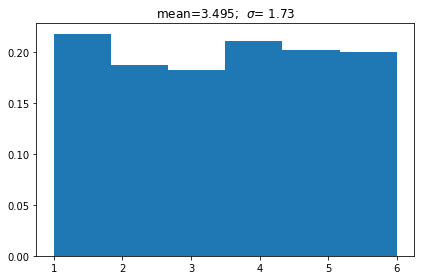

In [81]:
fig, axs = plt.subplots(1, 1, sharey=True, tight_layout=True)

n=1000
x = dice(n)
axs.hist(x, bins=6,density = True)
axs.set_title('mean='+str(np.mean(x))+r';  $\sigma$= {:.2f}'.format((np.std(x))))
plt.show()

In [10]:
#Calculating the standard deviation of the random distribution using np standard diviation function 
print(np.std(x))

1.6918034755845608


Theoretically the standard devation should be calculated by this formula
$$\sqrt{\sum_i^{1000}\frac{(3.5-x_i)^2}{1000}}$$

The theoretical value of mean is $(1+6)/2 = 3.5$

In [11]:
#Thus the theoretical standard deviation is
theo_std = ((3.5-1)**2*1000/6+(3.5-2)**2*1000/6+(3.5-3)**2*1000/6+\
            (3.5-4)**2*1000/6+(3.5-5)**2*1000/6+(3.5-6)**2*1000/6)**(1/2)/1000**(1/2)

print(theo_std)

1.707825127659933


Theoretical mean: 3.5, standard deviation: 1.707

##### Part (c)

In [12]:
def dices(N,n):
    res = np.array(dice(n))
    for i in range(N-1):
        res+=np.array(dice(n))
    return res  

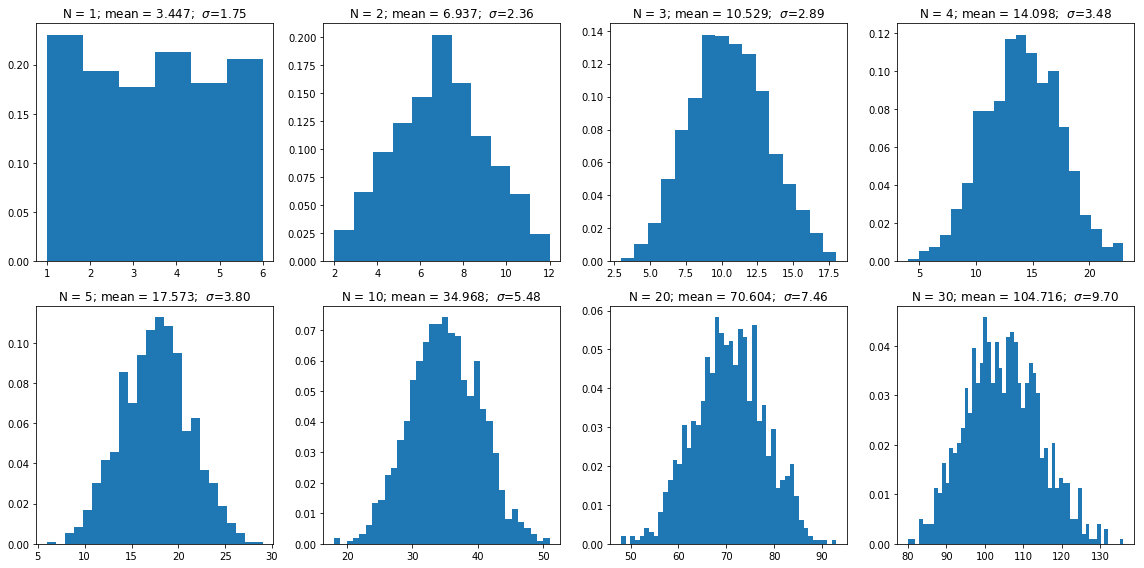

In [13]:
fig, axs = plt.subplots(2, 4, sharey=False, tight_layout=True,figsize = (16,8))
axx = axs.flatten()
N = [1,2,3,4,5,10,20,30]
n=1000
sigmas = []
means = []
for i in range(8):  
    x = dices(N[i],n)
    axx[i].hist(x, bins= max(x)-min(x)+1, density=True)
    axx[i].set_title("N = {}; ".format(N[i])+'mean = '\
                     +str(np.mean(x))+r';  $\sigma$={:.2f}'.format(np.std(x)))

In [14]:
N = np.arange(1,1e3,10).astype(int)
n=1000
sigmas = []
means = []

for i in range(len(N)):
    x = dices(N[i],n)
    sigmas += [np.std(x)]
    means += [np.mean(x)]

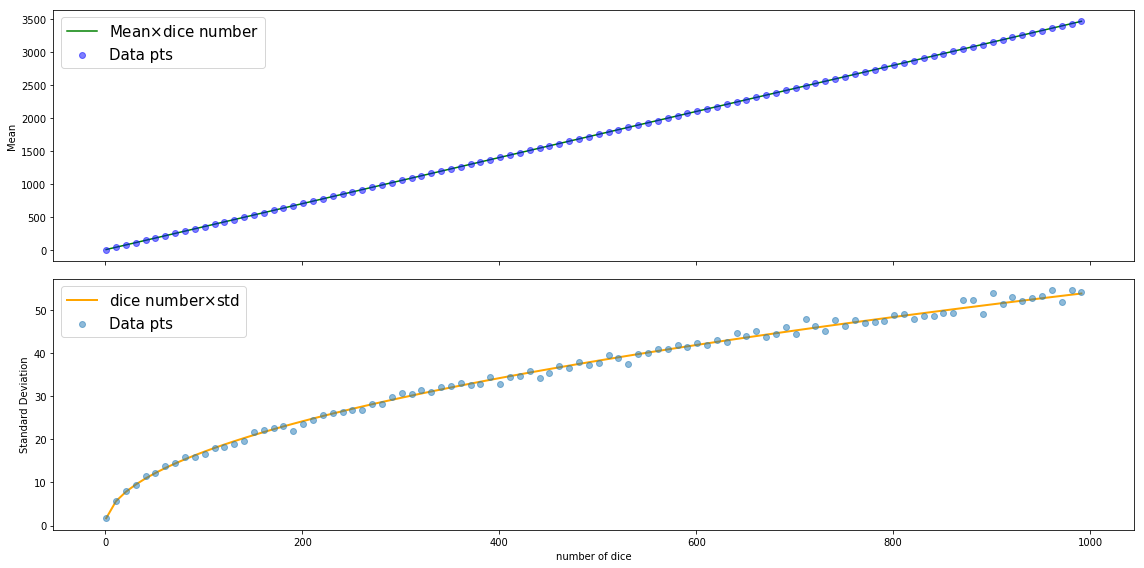

In [15]:
fig, axs = plt.subplots(2, 1, sharey=False,sharex = True, tight_layout=True,figsize = (16,8))
axx = axs.flatten()

axx[0].scatter(N,means, alpha = 0.5,color = 'blue',label = 'Data pts')
axx[0].plot(N,3.5*np.array(N),color = 'green',zorder = -1,label = r'Mean$\times$dice number')
axx[0].set_ylabel('Mean')
axx[1].scatter(N,sigmas,alpha = 0.5,label = 'Data pts')
axx[1].plot(N,np.sqrt(N)*theo_std,color = 'orange',zorder = -1,\
            linewidth = 2,label = r'dice number$\times$std')
axx[1].set_ylabel('Standard Deviation')
axx[1].set_xlabel('number of dice')

axx[0].legend(fontsize = 15)
axx[1].legend(fontsize = 15)

plt.show()

From the plots of the increment of standard deviation and mean values as a function of dice number follows the central limit theorem.

#### Problem 4: gamma peak

You are given a dataset (peak.dat, in the current directory) from a gamma-ray experiment consisting of ~1000 hits. Each line in the file corresponds to one recorded gamma-ray event, and stores the the measured energy of the gamma-ray. We will assume that the energies are randomly distributed about a common mean, and that each event is uncorrelated to others. Read the dataset from the enclosed file and:

a) Compute the mean and standard deviation of the given distribution of measured energies. These are estimates of the mean and standard deviation of the underlying parent distribution. Determine the uncertainties for these estimates of the mean and variance of the parent distribution. (Hint: The fractional uncertainty in the estimate of the standard deviation for Gaussian distributed data is given by Equation 2.8 in Reference 4, I. G. Hughes and T. P. A. Hase, "Measurements and their Uncertainties". For the purposes of this calculation, you can assume the sample data is drawn from a Gaussian distribution).

b) Produce a histogram of the distribution of energies. Choose the number of bins wisely, i.e. so that the width of each bin is smaller than the width of the peak, and at the same time so that the number of entries in the most populated bin is relatively large. Since this plot represents randomly-collected data, plotting error bars would be appropriate.

c) Fit the distribution to a Gaussian function using an unbinned fit (<i>Hint:</i> use <tt>scipi.stats.norm.fit()</tt> function), and compare the parameters of the fitted Gaussian with the mean and standard deviation computed in (b)

d) Fit the distribution to a Gaussian function using a binned least-squares fit (<i>Hint:</i> use <tt>scipy.optimize.curve_fit()</tt> function), and compare the parameters of the fitted Gaussian and their uncertainties to the parameters obtained in the unbinned fit above. 

e) How consistent is the distribution with a Gaussian? In other words, compare the histogram from (a) to the fitted curve, and compute a goodness-of-fit value, such as $\chi^2$/d.f.


In [16]:
data = pd.read_csv('peak.dat',header=None)

##### Part (a)

In [77]:
mean, std = norm.fit(data.values)
mean_err = std/np.sqrt(len(data.values))

l = len(data.values)
err_frac = 1/(2*l-2)**(1/2)
std_err = std*err_frac

In [80]:
print('The mean of the distribution is {} '.format(mean)+'with the error {}'.format(mean_err))
print('The mean of the distribution is {} '.format(std)+'with the error {}'.format(std_err))

The mean of the distribution is 1.7025749465 with the error 0.003310752531181145
The mean of the distribution is 0.1046951876770005 with the error 0.002342226972039586


The mean is 1.7 and stndard deviation is 0.11

##### Part (b,c)

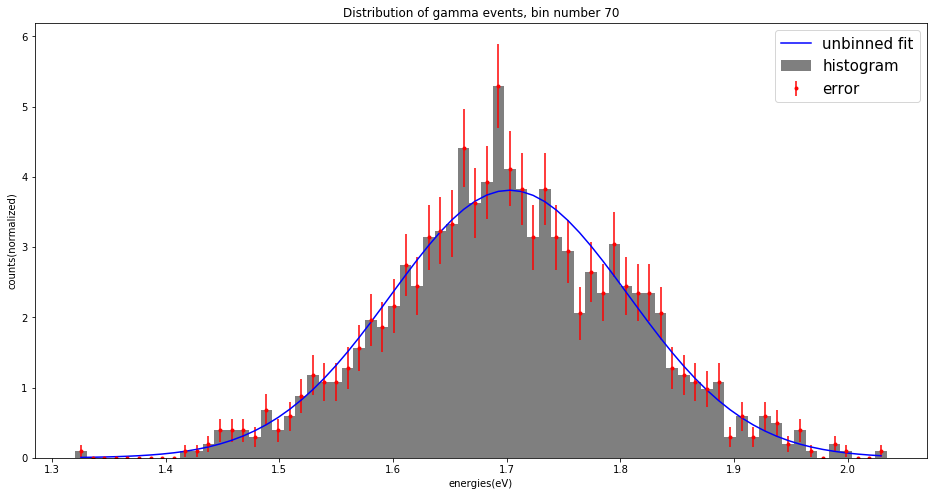

In [21]:
plt.figure(figsize = (16,8))
entries, edges, _ = plt.hist(data.values, bins = 70,density = True,\
                             color = 'black',alpha = 0.5,label = 'histogram')
bin_centers = 0.5 * (edges[:-1] + edges[1:])
plt.errorbar(bin_centers, entries, yerr=np.sqrt(2*np.pi)*std*np.sqrt(entries), \
             fmt='r.',label = 'error')

mean, std = norm.fit(data.values)
aa = norm.pdf(bin_centers,mean,std)
plt.plot(bin_centers,aa,color = 'b',label = 'unbinned fit')


plt.ylabel('counts(normalized)')
plt.xlabel('energies(eV)')

plt.title('Distribution of gamma events, bin number 70')
plt.legend(fontsize=15)

plt.show()

##### Part (d)

In [22]:
def normal(x,mean,sig):
    return(1/sig*1/np.sqrt(2*np.pi)*np.exp(-(x-mean)**2/(2*sig**2)))

In [23]:
paras, varis =scipy.optimize.curve_fit(normal,bin_centers,entries)
yerr=np.sqrt(2*np.pi)*std*np.sqrt(entries)

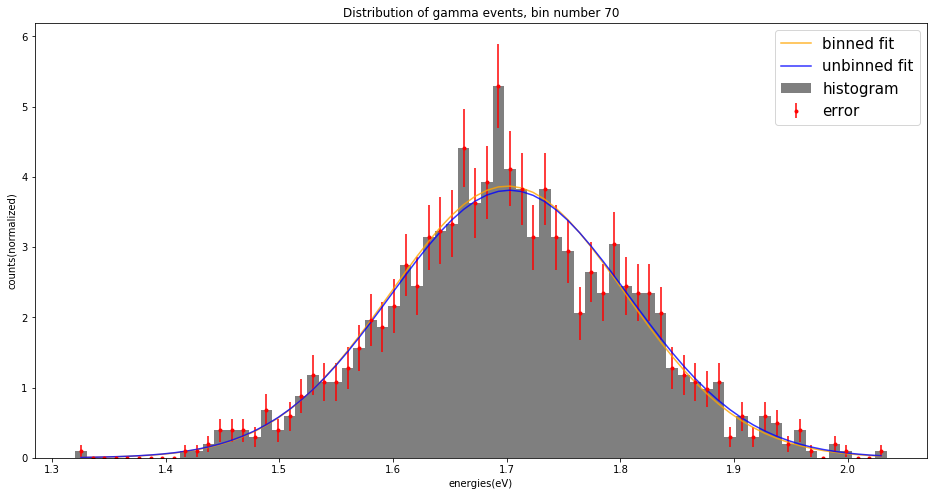

In [24]:
plt.figure(figsize = (16,8))
entries, edges, _ = plt.hist(data.values, bins = 70,density = True,\
                             color = 'black',alpha = 0.5,label= 'histogram')
bin_centers = 0.5 * (edges[:-1] + edges[1:])
plt.errorbar(bin_centers, entries, yerr=yerr, \
             fmt='r.',label = 'error')
mean = paras[0]
sig = paras[1]
plt.plot(bin_centers, normal(bin_centers,*paras),color = 'orange',label = 'binned fit',alpha = 0.8)
plt.plot(bin_centers,aa,color = 'blue',label = 'unbinned fit',alpha = 0.8)

plt.ylabel('counts(normalized)')
plt.xlabel('energies(eV)')

plt.title('Distribution of gamma events, bin number 70')
plt.legend(fontsize=15)

plt.show()

##### Part (e)
We calculate the chi square values for this distribution. 

In [25]:
l = len(entries)
chi = sum((aa[entries!=0]-entries[entries!=0])**2/yerr[entries!=0]**2)
print(chi/(70-2))

0.802811207728939


The chi square value is 0.8, which is a good fit for reduced chi square values. This means the fitted line passes through the error bars of the dataset.

#### Problem 5: Optical Pumping

In the optical pumping experiment (OPT) we measure the resonant frequency of a Zeeman transition as a function of the applied current (proportional to the applied magnetic field). Consider a mock data set:

<table border="1" align="center">
<tr>
<td>Current <i>I</i> (Amps)
</td><td>0.0 </td><td> 0.2 </td><td> 0.4 </td><td> 0.6 </td><td> 0.8 </td><td> 1.0 </td><td> 1.2 </td><td> 1.4 </td><td> 1.6 </td><td> 1.8 </td><td> 2.0 </td><td> 2.2
</td></tr>
<tr>
<td>Frequency <i>f</i> (MHz)
</td><td> 0.13 </td><td> 0.60 </td><td> 1.21 </td><td> 1.94 </td><td> 2.47 </td><td> 3.07 </td><td> 3.83 </td><td> 4.16 </td><td> 4.68 </td><td> 5.60 </td><td> 6.31 </td><td> 6.55
</td></tr></table>

a) Plot a graph of the pairs of values. Assuming a linear relationship between $I$ and $f$, determine the slope and the intercept of the best-fit line using the least-squares method with equal weights, and draw the best-fit line through the data points in the graph.

b) From what s/he knows about the equipment used to measure the resonant frequency, your lab partner hastily estimates the uncertainty in the measurement of $f$ to be $\sigma(f) = 0.07$ MHz. Estimate the probability that the straight line you found is an adequate description of the observed data if it is distributed with the uncertainty guessed by your lab partner. (Hint: use scipy.stats.chi2 class to compute the quantile of the chi2 distribution).  What can you conclude from these results? 

c) Assume that the best-fit line found in Part 1 is a good fit to the data. Estimate the uncertainty in measurement of $y$ from the scatter of the observed data about this line. Again, assume that all the data points have equal weight. Use this to estimate the uncertainty in both the slope and the intercept of the best-fit line. This is the technique you will use in the Optical Pumping lab to determine the uncertainties in the fit parameters.

d) Now assume that the uncertainty in each value of $f$ grows with $f$: $\sigma(f) = 0.07 + 0.03 * f$ (MHz). Determine the slope and the intercept of the best-fit line using the least-squares method with unequal weights (weighted least-squares fit)


In [26]:
#Transcribing the data in the chart above into numpy arrays.
current = np.array([0,0.2,0.4,0.6,0.8,1,1.2,1.4,1.6,1.8,2,2.2])
frequency = np.array([0.13,0.60,1.21,1.94,2.47,3.07,3.83,4.16,4.68,5.60,6.31,6.55])

##### Part (a)

In [27]:
def line(x,a,b):
    return (a*x+b)

In [28]:
paras1, varis1 =scipy.optimize.curve_fit(line,current,frequency) 
#fitting the line using the built-in least square fit from scipy

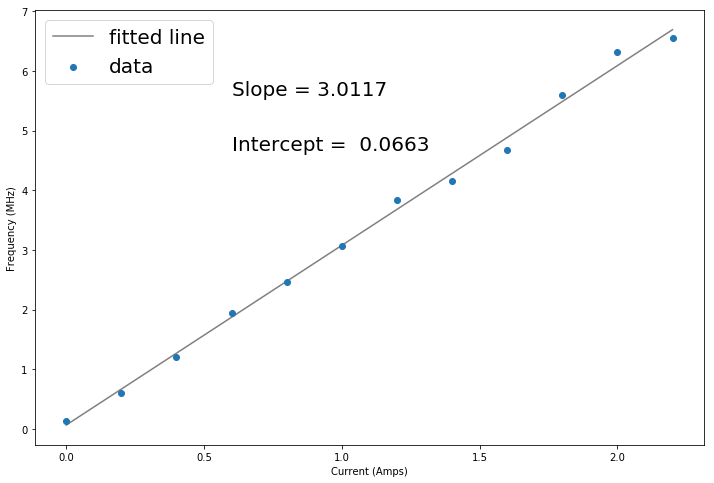

In [29]:
plt.figure(figsize = (12,8))

plt.scatter(current, frequency,label = 'data')
plt.plot(current, line(current,*paras1),color = "black", alpha = 0.5, zorder = -1,label = 'fitted line')
plt.xlabel('Current (Amps)')
plt.ylabel('Frequency (MHz)')
plt.annotate('Slope = {:.4f}'.format(paras1[0]),(current[3],frequency[-3]),fontsize = 20)
plt.annotate('Intercept =  {:.4f}'.format(paras1[1]),(current[3],frequency[-4]),fontsize = 20)
plt.legend(fontsize = 20)

plt.show()

##### Part (b)
We first calculate Chi square by using the formula:
$$\chi ^2 = \sum_i^n \frac{(y_i-y_{i,fitted})^2}{\sigma^2}$$
Then we use the chi2 package in scipy to find the percentile.

In [30]:
chi2_value = sum((frequency-line(current,*paras1))**2/0.07**2)
print('the calculated chi2 value is {:2f}'.format(chi2_value))

the calculated chi2 value is 36.307526


In [71]:
1-chi2.cdf(chi2_value,df = len(current)-2)
#The p value is less than 0.00007
#Using 0.07 as our error significantly underestimates our error

7.452228959925478e-05

From the chi square distribution test, our fitting has less than $0.01\%$ of confidence. Thus there might be other sources of error. The fit is not good.

##### Part (c)

In [32]:
yerr = np.empty(len(current))
yerr.fill(0.07) #fill the error with uniform 0.07 value.
paras2, varis2 =scipy.optimize.curve_fit(line,current,frequency,sigma = yerr)

Using the covariance tensor scipy returns from the fitting, we can get the uncertainty in the fitting parameters.

In [33]:
print("The uncertainty in slope is {}".format(np.sqrt(varis2[0,0])))

The uncertainty in slope is 0.05576971191591473


In [34]:
print("The uncertainty in intercept is {}".format(np.sqrt(varis2[1,1])))

The uncertainty in intercept is 0.07242908061646726


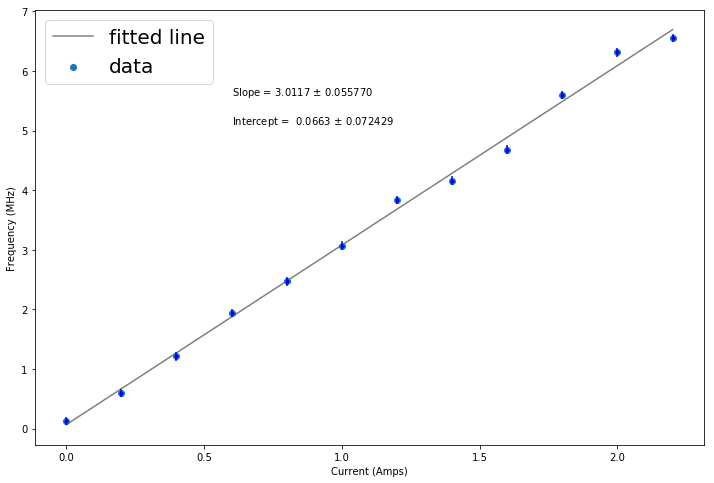

In [35]:
plt.figure(figsize = (12,8))

plt.scatter(current, frequency,label = 'data')
plt.plot(current, line(current,*paras2),color = "black", alpha = 0.5, \
         zorder = -1,label = 'fitted line')

plt.annotate(r'Slope = {a:.4f} $\pm$ {b:4f}'.format(a = paras2[0],b=np.sqrt(varis2[0,0])),\
             (current[3],frequency[-3]),fontsize = 10)
plt.annotate(r'Intercept =  {a:.4f} $\pm$ {b:4f}'.format(a = paras2[1],b=np.sqrt(varis2[1,1])),\
             (current[3],(frequency[-3]-0.5)),fontsize = 10)

plt.errorbar(current, frequency, yerr,fmt = 'b.')

plt.xlabel('Current (Amps)')
plt.ylabel('Frequency (MHz)')
plt.legend(fontsize = 20)

plt.show()

##### Part (d)

In [36]:
#Using the weighted least square fit in scipy
yerr = np.empty(len(current))
yerr.fill(0.07)
yerr = yerr + 0.03*frequency
paras3, varis3 =scipy.optimize.curve_fit(line,current,frequency,sigma = \
                                         yerr,absolute_sigma=True)

In [37]:
print(r'slope = {a:.4f}'.format(a = paras3[0])+' with error'+' {b:.2f}'
      .format(b = np.sqrt(varis3[0,0])))
print(r'intercept = {a:.4f}'.format(a = paras3[1])+' with error'+' {b:.2f}'
      .format(b = np.sqrt(varis3[1,1])))

slope = 2.9976 with error 0.06
intercept = 0.0751 with error 0.05


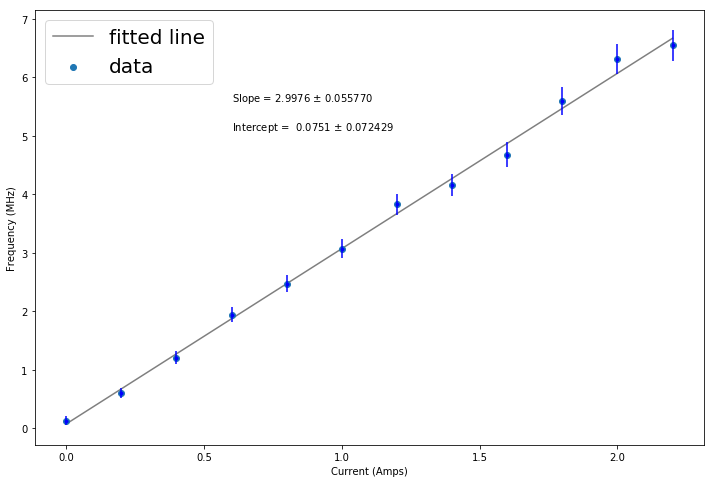

In [38]:
plt.figure(figsize = (12,8))

plt.scatter(current, frequency,label = 'data')
plt.plot(current, line(current,*paras3),color = "black", alpha = 0.5, \
         zorder = -1,label = 'fitted line')

plt.annotate(r'Slope = {a:.4f} $\pm$ {b:4f}'.format(a = paras3[0],b=np.sqrt(varis2[0,0])),\
             (current[3],frequency[-3]),fontsize = 10)
plt.annotate(r'Intercept =  {a:.4f} $\pm$ {b:4f}'.format(a = paras3[1],b=np.sqrt(varis2[1,1])),\
             (current[3],(frequency[-3]-0.5)),fontsize = 10)

plt.errorbar(current, frequency, yerr,fmt = 'b.')

plt.xlabel('Current (Amps)')
plt.ylabel('Frequency (MHz)')
plt.legend(fontsize = 20)

plt.show()